In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
# Current Directory

print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/abenadonkor


In [7]:
# in case you want to change the directory use the below code.
#I am currently using my directory

os.chdir("/Users/abenadonkor/Downloads")
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/abenadonkor/Downloads


In [9]:
# Loading the data for analysis

df = pd.read_csv('American_Housing_Data_20231209.csv', low_memory=False)
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [10]:
len(df)

39981

In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [13]:
# Find unique values in the dataset

pd.options.display.max_rows = 4000
unique = df.nunique()
unique

Zip Code                    1733
Price                       5196
Beds                          31
Baths                         28
Living Space                4623
Address                    38827
City                         243
State                         29
Zip Code Population         1712
Zip Code Density            1706
County                        88
Median Household Income     1722
Latitude                    1733
Longitude                   1733
dtype: int64

In [14]:
# checking for the null values in the data
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [19]:
# Handling missing values

#Identifying  missing values

missing_values = df.isnull().sum()

In [20]:
# get percentage of the missing value

pd.set_option('display.max_rows', None)
df.isnull().sum()/len(df)* 100

Zip Code                   0.000000
Price                      0.000000
Beds                       0.000000
Baths                      0.000000
Living Space               0.000000
Address                    0.000000
City                       0.000000
State                      0.000000
Zip Code Population        0.000000
Zip Code Density           0.000000
County                     0.000000
Median Household Income    0.005002
Latitude                   0.000000
Longitude                  0.000000
dtype: float64

In [21]:

# Display columns with missing values
missing_values[missing_values > 0]

Median Household Income    2
dtype: int64

In [22]:
# identfying the datatypes 

df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [25]:
# Removing all  duplicate rows
data = data.drop_duplicates()

In [26]:
# Display the number of rows and columns after removing duplicates
data.shape

(39019, 14)

In [27]:
# Fill missing values in 'Median Household Income' with the median of the column

median_income = data['Median Household Income'].median()
data['Median Household Income'].fillna(median_income, inplace=True)

In [28]:
# Create a new feature 'Price per Square Foot'

data['Price per SqFt'] = data['Price'] / data['Living Space']

In [29]:
# Display the first few rows to verify the changes
data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,Price per SqFt
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,2033.045247
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,2298.050139
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,494.148244
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1833.333333
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260,1189.580093


In [31]:
# Finding the correlation between the columns

df.corr()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
Zip Code,1.000000,0.110929,0.014740,0.004543,0.032537,-0.024488,-0.105494,0.148406,-0.050228,-0.940078
Price,0.110929,1.000000,0.277072,0.462072,0.520565,-0.042924,0.152544,0.416785,-0.058837,-0.168266
Beds,0.014740,0.277072,1.000000,0.703425,0.655098,0.069366,-0.131888,0.014459,-0.051626,0.006812
Baths,0.004543,0.462072,0.703425,1.000000,0.769079,0.001957,-0.068164,0.226429,-0.101349,0.000718
Living Space,0.032537,0.520565,0.655098,0.769079,1.000000,-0.042956,-0.103706,0.222995,-0.062532,-0.011148
Zip Code Population,-0.024488,-0.042924,0.069366,0.001957,-0.042956,1.000000,0.112308,-0.125361,-0.083752,-0.019359
Zip Code Density,-0.105494,0.152544,-0.131888,-0.068164,-0.103706,0.112308,1.000000,0.175198,0.184290,0.021751
Median Household Income,0.148406,0.416785,0.014459,0.226429,0.222995,-0.125361,0.175198,1.000000,0.047571,-0.220311
Latitude,-0.050228,-0.058837,-0.051626,-0.101349,-0.062532,-0.083752,0.184290,0.047571,1.000000,-0.046189
Longitude,-0.940078,-0.168266,0.006812,0.000718,-0.011148,-0.019359,0.021751,-0.220311,-0.046189,1.000000


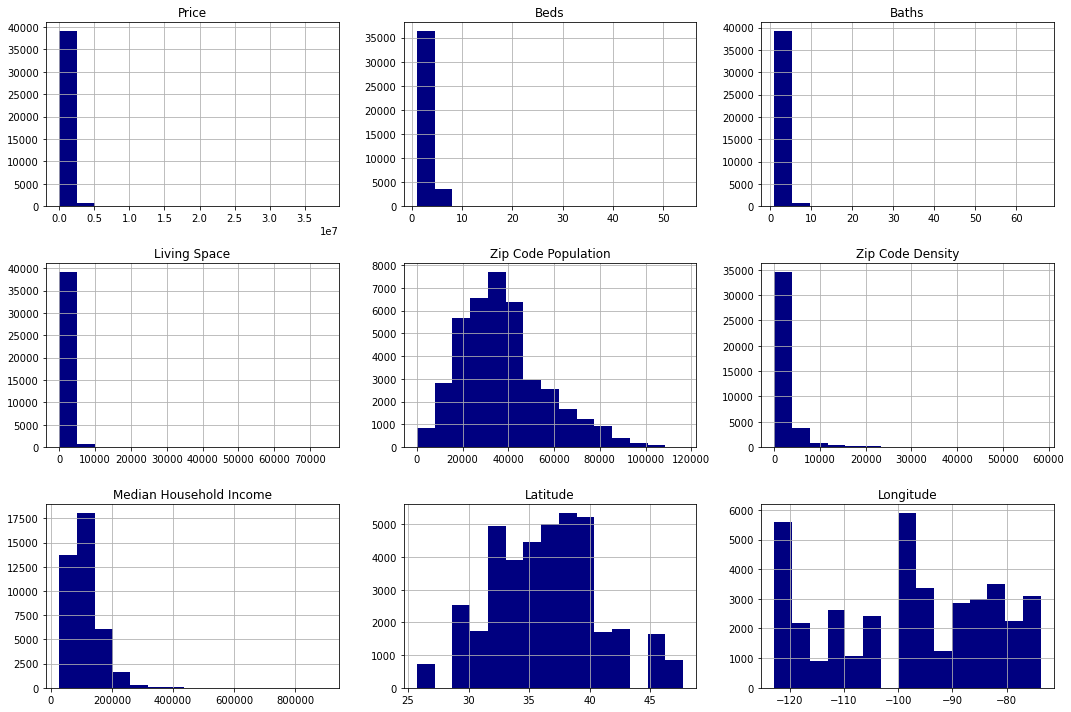

In [70]:
# plotting for all the numerical values

numerical_features = ['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='navy')  # Changed color to navy blue
plt.tight_layout()
plt.show()

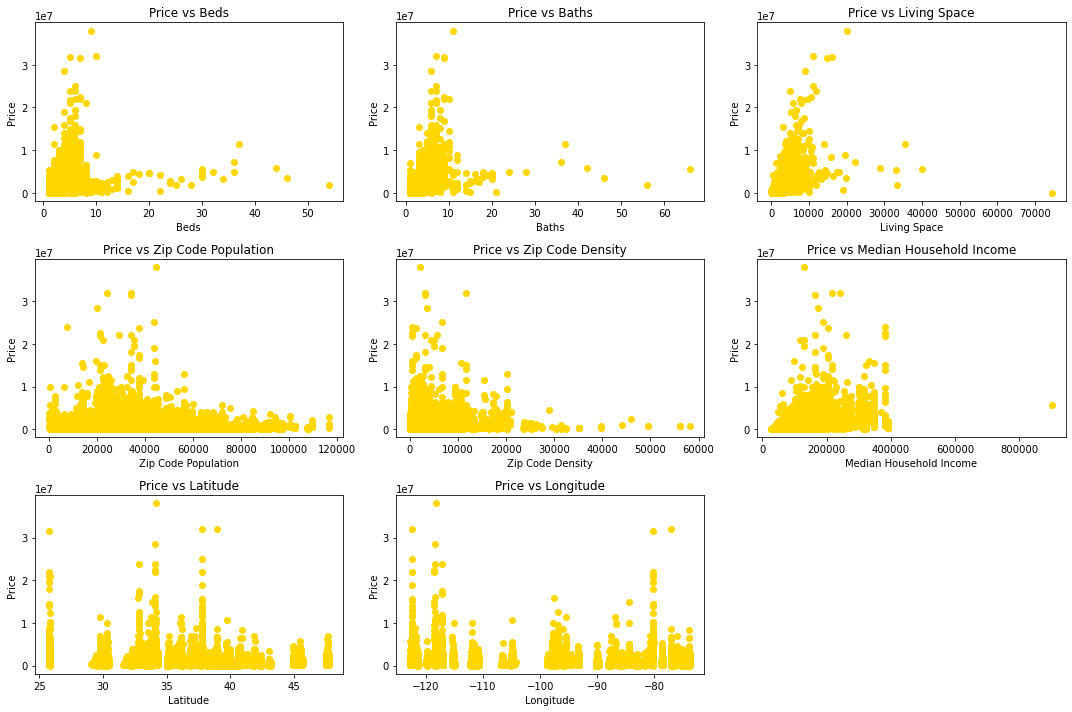

In [67]:
# establishing the relationship between prices and other numerical values

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[1:], 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['Price'], color='gold')  # Changed color to gold
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

In [34]:
# Define the feature columns and target variable
features = data.drop(columns=['Price', 'Address', 'City', 'State', 'County'])
target = data['Price']

In [35]:
# Split the data into two set, The training set and the testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [36]:
# Displaying  the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31215, 10), (7804, 10), (31215,), (7804,))

In [40]:
# Initialize the model
linear_regxion = LinearRegression()

In [41]:
# Train the model
linear_regxion.fit(X_train, y_train)

LinearRegression()

In [42]:
# Make predictions
y_pred_train = linear_regxion.predict(X_train)
y_pred_test = linear_regxion.predict(X_test)

In [43]:
# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train, rmse_train, mae_test, rmse_test

(277517.2487916865, 686251.0651273474, 287725.84245643404, 881271.1099213443)

In [49]:
from sklearn.linear_model import Lasso

# Initialize the model
lasso_reg = Lasso()


In [45]:
# Train the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [46]:
# Make predictions
y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)

In [47]:
# Evaluate the model
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
mae_train_lasso, rmse_train_lasso, mae_test_lasso, rmse_test_lasso

(277516.9641857139, 686251.065130596, 287725.52348038746, 881271.1832587802)

In [50]:
# Initialize the model
gbr = GradientBoostingRegressor()

In [51]:
# Train the model
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [52]:
# Make predictions
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)


In [53]:
# Evaluate the model
mae_train_gbr = mean_absolute_error(y_train, y_pred_train_gbr)
rmse_train_gbr = np.sqrt(mean_squared_error(y_train, y_pred_train_gbr))
mae_test_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
rmse_test_gbr = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr))

mae_train_gbr, rmse_train_gbr, mae_test_gbr, rmse_test_gbr

(25677.335699375366, 52395.71600116492, 30372.63932731063, 124896.5015922944)

In [54]:

# Initialize the model
ridge_reg = Ridge()


In [55]:
# Train the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [56]:
# Make predictions
y_pred_train_ridge = ridge_reg.predict(X_train)
y_pred_test_ridge = ridge_reg.predict(X_test)

In [57]:
# Evaluate the model
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

mae_train_ridge, rmse_train_ridge, mae_test_ridge, rmse_test_ridge

(277516.5802062733, 686251.0651506435, 287725.08385630074, 881271.0785952109)

In [58]:
# visualising the performance 

# Names of the models evaluated
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Gradient Boosting Regression']



In [59]:
# Performance metrics
mae_train = [277517.25, 277516.58, 277516.96, 25677.34]
mae_test = [287725.84, 287725.08, 287725.52, 30399.71]
rmse_train = [686251.07, 686251.07, 686251.07, 52395.72]
rmse_test = [881271.11, 881271.08, 881271.18, 125123.16]


In [60]:
# Plotting Mean Absolute Error (MAE) for both training and testing sets
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(model_names))

<Figure size 864x432 with 0 Axes>

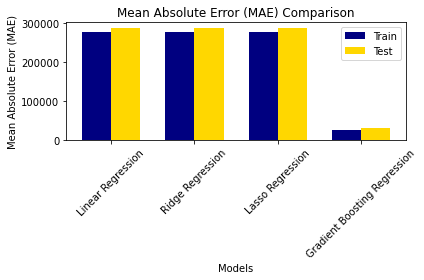

In [68]:
# Bar chart for MAE
plt.bar(index, mae_train, bar_width, color='navy', label='Train')  # Changed color to navy blue
plt.bar(index + bar_width, mae_test, bar_width, color='gold', label='Test')  # Changed color to gold

plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()



In [62]:
# Plotting Root Mean Squared Error (RMSE) for both training and testing sets
plt.figure(figsize=(12, 6))


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

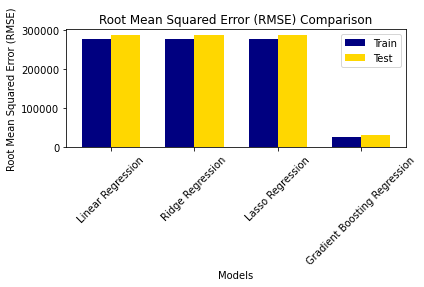

In [69]:
# Bar chart for RMSE
plt.bar(index, mae_train, bar_width, color='navy', label='Train')  # Changed color to navy blue
plt.bar(index + bar_width, mae_test, bar_width, color='gold', label='Test')  # Changed color to gold

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Four Advance Regression techniques where performed namely linear, Lasso,Gradient Boost and Ridge Regression.
